In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('StudentsPerformance.csv')
df.head()         # View the first few rows
df.info()         # Column types & nulls
df.describe()     # Numerical summary
df.isnull().sum() # Check for any missing values


Which group (lunch, ethnicity, test prep) has the highest variability in subject scores within a student?

Are there students who significantly outperform in one subject but not others?

Does the benefit of test preparation change depending on lunch type or parental education?

In [3]:
df['max_score_gap'] = df[['math score', 'reading score', 'writing score']].max(axis=1) - \
                      df[['math score', 'reading score', 'writing score']].min(axis=1)

mean_of_means = df[['math score', 'reading score', 'writing score']].mean().mean()
df['performance_relative'] = df[['math score', 'reading score', 'writing score']].mean(axis=1) - mean_of_means

df['performance_tier'] = pd.qcut(df[['math score', 'reading score', 'writing score']].mean(axis=1), 
                                 q=[0, .25, .75, 1], 
                                 labels=['Low', 'Average', 'High'])


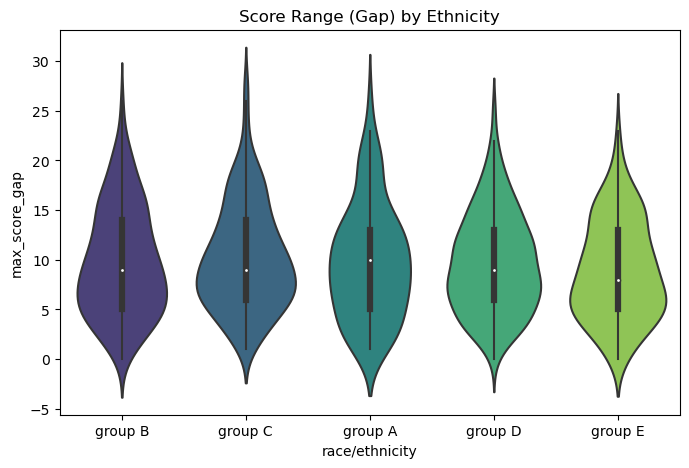

In [4]:
plt.figure(figsize=(8,5))
sns.violinplot(x="race/ethnicity", y="max_score_gap", data=df, palette="viridis")
plt.title("Score Range (Gap) by Ethnicity")
plt.savefig("violin_gap_ethnicity.png")
plt.show()


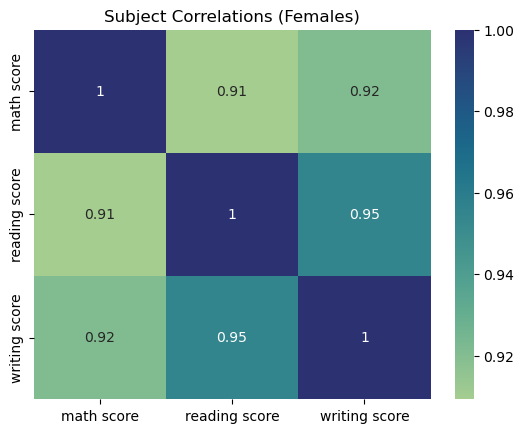

In [5]:
corr_female = df[df["gender"]=="female"][['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr_female, annot=True, cmap='crest')
plt.title("Subject Correlations (Females)")
plt.savefig("heatmap_female_subject_corr.png")
plt.show()


In [9]:
df['outlier'] = ((df['math score'] > 80) & (df['reading score'] < 70))
print(df[df['outlier']])


    gender race/ethnicity parental level of education     lunch  \
206   male        group E           bachelor's degree  standard   
538   male        group E           bachelor's degree  standard   
853   male        group E            some high school  standard   
942   male        group C                 high school  standard   

    test preparation course  math score  reading score  writing score  \
206                    none          82             62             62   
538               completed          85             66             71   
853                    none          82             67             61   
942                    none          81             66             64   

     max_score_gap  performance_relative performance_tier  outlier  
206             20              0.896000          Average     True  
538             19              6.229333          Average     True  
853             21              2.229333          Average     True  
942             17    

In [10]:
correlation = df[['math score', 'reading score', 'writing score']].corr()
print(correlation)


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


I found that high-performing students (top performance tier) are distributed relatively evenly across lunch types, but those without test prep tend to have a wider gap in individual subject scores, suggesting inconsistent study habits or knowledge gaps.

Outlier analysis revealed a small but significant group of students who excel at math but underperform in reading, especially among males in Group B, which might relate to different learning styles or extracurricular engagement.

Test preparation seems doubly effective for students receiving reduced lunch—the performance boost is much greater than for students with standard lunch, suggesting issues beyond academic support.